In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib

import load_data

In [192]:
importlib.reload(load_data)

<module 'load_data' from '/Users/nastia/school/master/hec/reshaping_business_with_ai_bcg/reshaping_business_with_ai_bcg/load_data.py'>

In [193]:
df = load_data.read_and_process_parquet()

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63319315 entries, 0 to 63319314
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   date_order     datetime64[ns]
 1   date_invoice   datetime64[ns]
 2   product_id     int64         
 3   client_id      int64         
 4   sales_net      float64       
 5   quantity       int64         
 6   order_channel  object        
 7   branch_id      int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(1)
memory usage: 3.8+ GB


In [187]:
# Group the data by 'date_order' and 'client_id', and calculate the sum of sales for each group
sales_sum_df = df.groupby(['date_order', 'client_id'])['sales_net'].sum().reset_index()
sales_sum_df

,date_order,client_id,sales_net
0,2017-09-22,403403,665.242800
1,2017-09-22,585799,654.616800
2,2017-09-22,591886,0.000000
3,2017-09-22,688261,2443.568280
4,2017-09-22,791423,331.034400
...,...,...,...
7955284,2019-09-22,2039787,151.982160
7955285,2019-09-22,2058530,1403.121571
7955286,2019-09-22,2076261,166.037000
7955287,2019-09-22,2153179,1419.274800


In [161]:
client_id = 20147
client_data = sales_sum_df[sales_sum_df['client_id'] == client_id]
# Sort the data by date_order
client_data = client_data.sort_values('date_order')

In [162]:
client_data.drop(columns=['client_id'], inplace=True)

In [163]:
trend = client_data.set_index('date_order')['sales_net'].diff().dropna()

In [164]:
# Step 2: Check for a consistent decreasing trend
is_decreasing = trend.mean() < 0

In [165]:
trend.mean()

-1.5766306315789516

In [166]:
is_decreasing

True

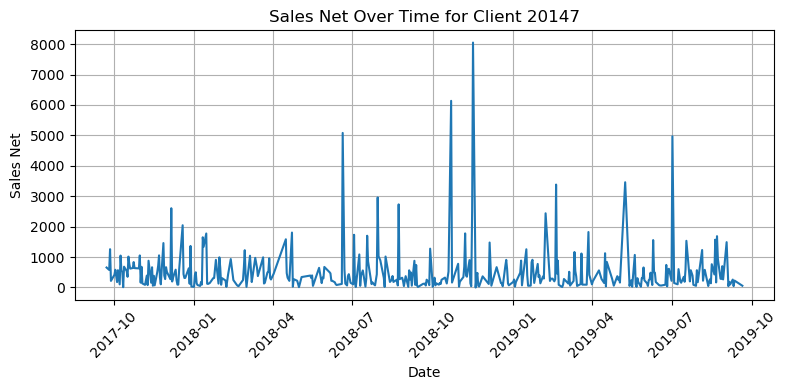

In [167]:
# Plot sales_net over time
plt.figure(figsize=(8, 4))
plt.plot(client_data['date_order'], client_data['sales_net'], linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sales Net')
plt.title(f'Sales Net Over Time for Client {client_id}')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

In [168]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381 entries, 7 to 7945599
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_order  381 non-null    datetime64[ns]
 1   sales_net   381 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


In [170]:
# Step 2: Set date_order as the index
df = client_data.copy()

# Step 2: Set date_order as the index
df.set_index('date_order', inplace=True)

In [171]:
df.head()

,sales_net
date_order,
2017-09-23,656.433800
2017-09-26,576.957300
2017-09-27,1258.612900
2017-09-28,216.118672
2017-10-02,418.038340


In [172]:
# Resample the DataFrame to monthly frequency and calculate the sum
monthly_sales_sum = df.resample('M').sum()

In [175]:
monthly_sales_sum.tail()

,sales_net
date_order,
2019-05-31,7929.752596
2019-06-30,6187.725268
2019-07-31,11110.662437
2019-08-31,10232.313228
2019-09-30,2404.254408


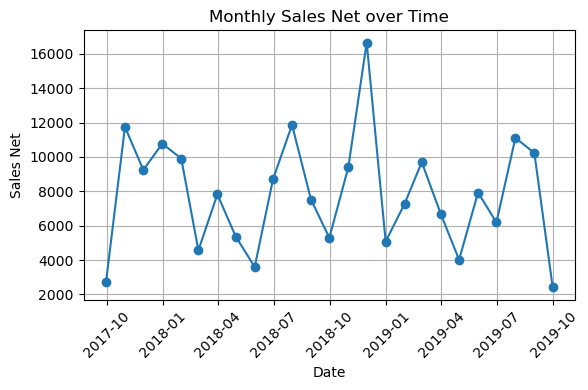

In [176]:
plt.figure(figsize=(6, 4))
plt.plot(monthly_sales_sum.index, monthly_sales_sum['sales_net'], marker='o', linestyle='-')
plt.title('Monthly Sales Net over Time')
plt.xlabel('Date')
plt.ylabel('Sales Net')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [179]:
monthly_diff = monthly_sales_sum['sales_net'].diff()

In [181]:
monthly_diff.tail()

date_order
2019-05-31    3914.054138
2019-06-30   -1742.027327
2019-07-31    4922.937169
2019-08-31    -878.349209
2019-09-30   -7828.058820
Freq: M, Name: sales_net, dtype: float64

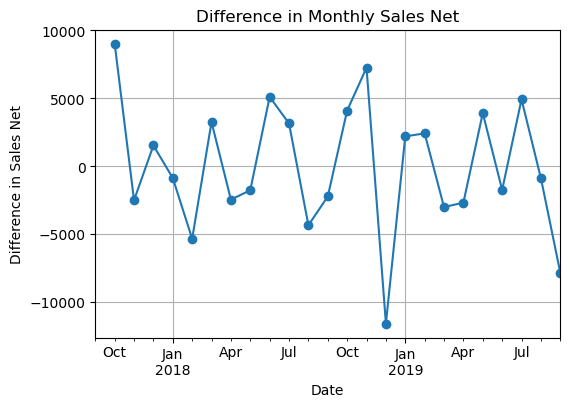

In [182]:
# Plot the difference in monthly sales net
# Plot percentages
monthly_diff.plot(figsize=(6, 4), marker='o', linestyle='-')
plt.title('Difference in Monthly Sales Net')
plt.xlabel('Date')
plt.ylabel('Difference in Sales Net')
plt.grid(True)
plt.show()

In [78]:
# Step 3: Calculate rolling sum of sales_net over different time periods
rolling_sum_1m = df['sales_net'].rolling('30D').sum()
rolling_sum_3m = df['sales_net'].rolling('90D').sum()
rolling_sum_6m = df['sales_net'].rolling('180D').sum()

In [85]:
rolling_sum_1m

date_order
2017-09-23      656.433800
2017-09-26     1233.391100
2017-09-27     2492.004000
2017-09-28     2708.122672
2017-10-02     3126.161012
                  ...     
2019-09-06    10146.803713
2019-09-09     9825.319219
2019-09-10     9869.111219
2019-09-11    10047.575273
2019-09-20     6567.114620
Name: sales_net, Length: 381, dtype: float64

In [79]:
# Step 4: Calculate the change over each time period
change_1m = rolling_sum_1m.diff()
change_3m = rolling_sum_3m.diff()
change_6m = rolling_sum_6m.diff()

In [86]:
change_1m

date_order
2017-09-23            NaN
2017-09-26     576.957300
2017-09-27    1258.612900
2017-09-28     216.118672
2017-10-02     418.038340
                 ...     
2019-09-06    -350.800171
2019-09-09    -321.484493
2019-09-10      43.792000
2019-09-11     178.464053
2019-09-20   -3480.460653
Name: sales_net, Length: 381, dtype: float64

In [81]:
change_1m.iloc[-1]

-3480.460652580088

In [82]:
change_3m.iloc[-1]

-77.92584000000352

In [83]:
change_6m.iloc[-1]

-1263.3876999999993

In [84]:
change_1m

date_order
2017-09-23            NaN
2017-09-26     576.957300
2017-09-27    1258.612900
2017-09-28     216.118672
2017-10-02     418.038340
                 ...     
2019-09-06    -350.800171
2019-09-09    -321.484493
2019-09-10      43.792000
2019-09-11     178.464053
2019-09-20   -3480.460653
Name: sales_net, Length: 381, dtype: float64

In [80]:
# Step 5: Check if the change over the last period is negative
is_decreasing = change_1m.iloc[-1] < 0 or change_3m.iloc[-1] < 0 or change_6m.iloc[-1] < 0

# Step 6: Determine if the client is at risk for churn
if is_decreasing:
    print("Client is at risk for churn")
else:
    print("Client is not at risk for churn")

Client is at risk for churn


In [6]:
df.head()

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
0,2017-09-25,2017-09-25,2376333,188502,155.44320,3,online,2732
1,2017-09-25,2017-09-25,2520527,835089,16.39440,3,at the store,10279
2,2017-09-25,2017-09-25,2536756,1977896,365.76624,21,online,6184
3,2017-09-25,2017-09-25,3028673,598816,8.59878,201,at the store,4200
4,2017-09-25,2017-09-25,203377,2086861,1093.37400,3,by phone,7051


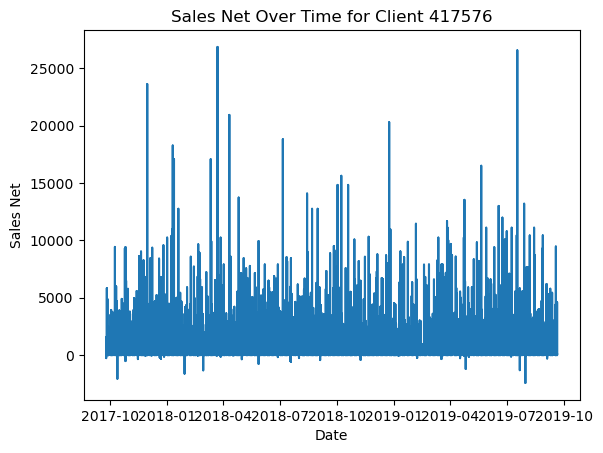

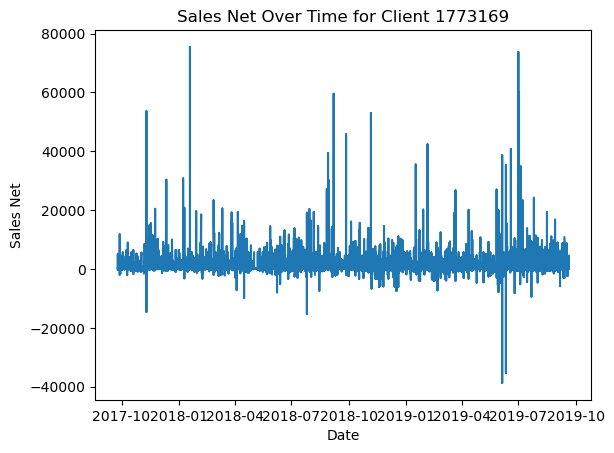

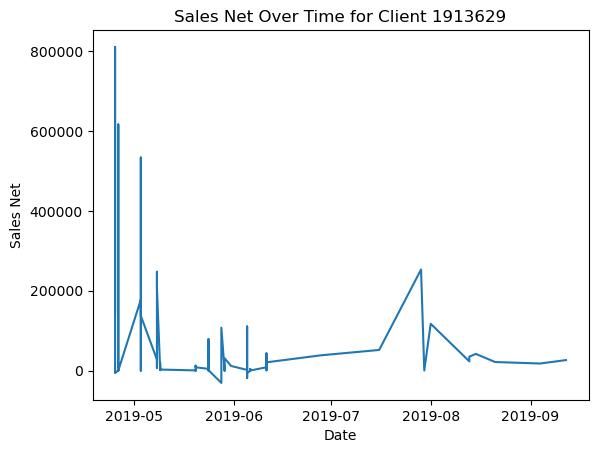

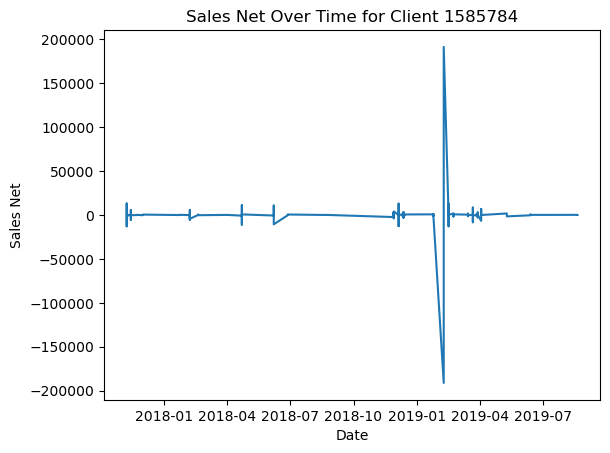

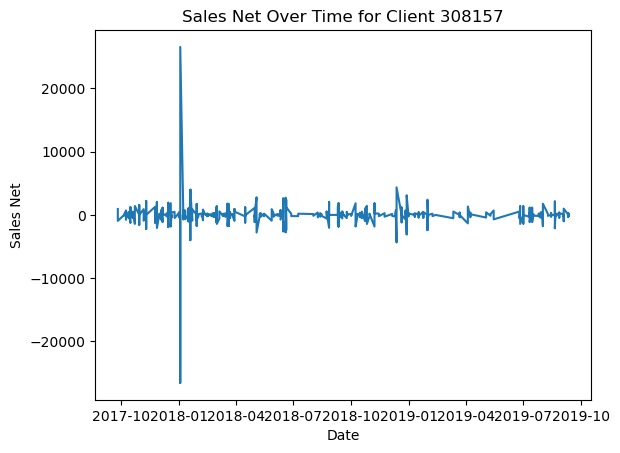

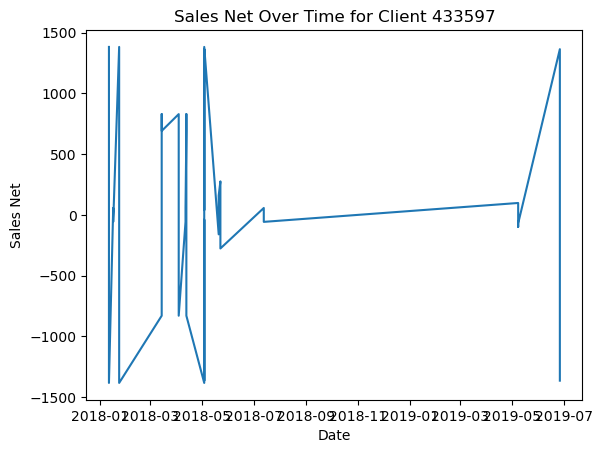

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data

# Group the data by client_id and calculate the total sales_net for each client
client_sales = df.groupby('client_id')['sales_net'].sum()

# Identify the three clients with the highest total sales_net
top_clients = client_sales.nlargest(3)

# Identify the three clients with the lowest total sales_net
bottom_clients = client_sales.nsmallest(3)

# Plot sales_net over time for each of the top clients
for client_id in top_clients.index:
    client_data = df[df['client_id'] == client_id]
    client_data = client_data.sort_values('date_order')  # Sort by date_order
    plt.figure()  # Create a new figure for each client
    plt.plot(client_data['date_order'], client_data['sales_net'])
    plt.xlabel('Date')
    plt.ylabel('Sales Net')
    plt.title(f'Sales Net Over Time for Client {client_id}')

# Plot sales_net over time for each of the bottom clients
for client_id in bottom_clients.index:
    client_data = df[df['client_id'] == client_id]
    client_data = client_data.sort_values('date_order')  # Sort by date_order
    plt.figure()  # Create a new figure for each client
    plt.plot(client_data['date_order'], client_data['sales_net'])
    plt.xlabel('Date')
    plt.ylabel('Sales Net')
    plt.title(f'Sales Net Over Time for Client {client_id}')

plt.show()